In [1]:
#Import the necessary libraries (numpy and pandas)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
#read the scraped file
df = pd.read_csv('tweetfinalelectricitykerala2.csv')

/Users/noeljoseph/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,8,9,10,11,28,31,36,39,40,41,42,43,45,55,56,135,146,147,153,154,155,156,157,159,160,162,163,164,165,166,167,174,175,176,177,178,179,181,187,188,189,190,193,198,203,206,207,208,209,210,211,212,213,215,234) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5353 entries, 0 to 5352
Columns: 235 entries, Unnamed: 0 to quotedTweet.inReplyToUser.url
dtypes: float64(89), object(146)
memory usage: 9.6+ MB


In [4]:
# drop the columns that are not required
df = df.drop(['_type', 'url', 'renderedContent', 'id', 'user',
                 'quoteCount', 'conversationId', 'source', 'sourceUrl',
                 'outlinks', 'tcooutlinks', 'media', 'retweetedTweet',
                 'quotedTweet', 'inReplyToTweetId','inReplyToUser',
                 'mentionedUsers', 'coordinates', 'place', 'cashtags',
                 'user_type', 'userID', 'user_description_urls',
                 'user_protected', 'user_link_url', 'user_linkTcourl',
                 'user_profile_imageUrl', 'user_profile_bannerUrl', 'user_label',
                 'user_url', 'label._type', 'label.description', 'label.url',
                 'label.badgeUrl', 'label.longDescription', '_type', 'id',
                 'quotedTweet.mentionedUsers', 'quotedTweet.coordinates',
                 'quotedTweet.place', 'quotedTweet.hashtags', 'quotedTweet.cashtags',
                  'quotedTweet.source','quotedTweet.sourceUrl', 'quotedTweet.sourceLabel', 'quotedTweet.outlinks',
                 'quotedTweet.tcooutlinks', 'quotedTweet.media', 'quotedTweet.retweetedTweet',
                 'quotedTweet.quotedTweet', 'quotedTweet.inReplyToTweetId', 'quotedTweet.inReplyToUser'], axis = 'columns')

In [5]:
# drop additional columns that appear towards the right of the last relevant column
df.drop(df.columns[[22,23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
                    39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
                    57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,
                    76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
                    95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
                    111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
                    126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
                    141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
                    156, 157, 158, 159, 160, 161]], axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5353 entries, 0 to 5352
Data columns (total 45 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Unnamed: 0                                  5353 non-null   object 
 1   date                                        5350 non-null   object 
 2   content                                     5350 non-null   object 
 3   replyCount                                  5349 non-null   object 
 4   retweetCount                                5349 non-null   object 
 5   likeCount                                   5349 non-null   object 
 6   lang                                        5348 non-null   object 
 7   sourceLabel                                 5348 non-null   object 
 8   hashtags                                    2119 non-null   object 
 9   username                                    5348 non-null   object 
 10  user_dispaly

In [7]:
# drop additional columns that appear towards the right of the last relevant column
df.drop(df.columns[[22,23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
                    39, 40, 41, 42, 43, 44]], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5353 entries, 0 to 5352
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             5353 non-null   object 
 1   date                   5350 non-null   object 
 2   content                5350 non-null   object 
 3   replyCount             5349 non-null   object 
 4   retweetCount           5349 non-null   object 
 5   likeCount              5349 non-null   object 
 6   lang                   5348 non-null   object 
 7   sourceLabel            5348 non-null   object 
 8   hashtags               2119 non-null   object 
 9   username               5348 non-null   object 
 10  user_dispaly_name      5348 non-null   object 
 11  user_description       4629 non-null   object 
 12  user_raw_description   4629 non-null   object 
 13  user_verified          5349 non-null   object 
 14  user_created           5349 non-null   object 
 15  user

In [14]:
# drop the rows
#df.drop(df.index[5500:4907],0,inplace=True)

In [9]:
df['replyCount'].astype(str).astype(int)

ValueError: invalid literal for int() with base 10: 'nan'

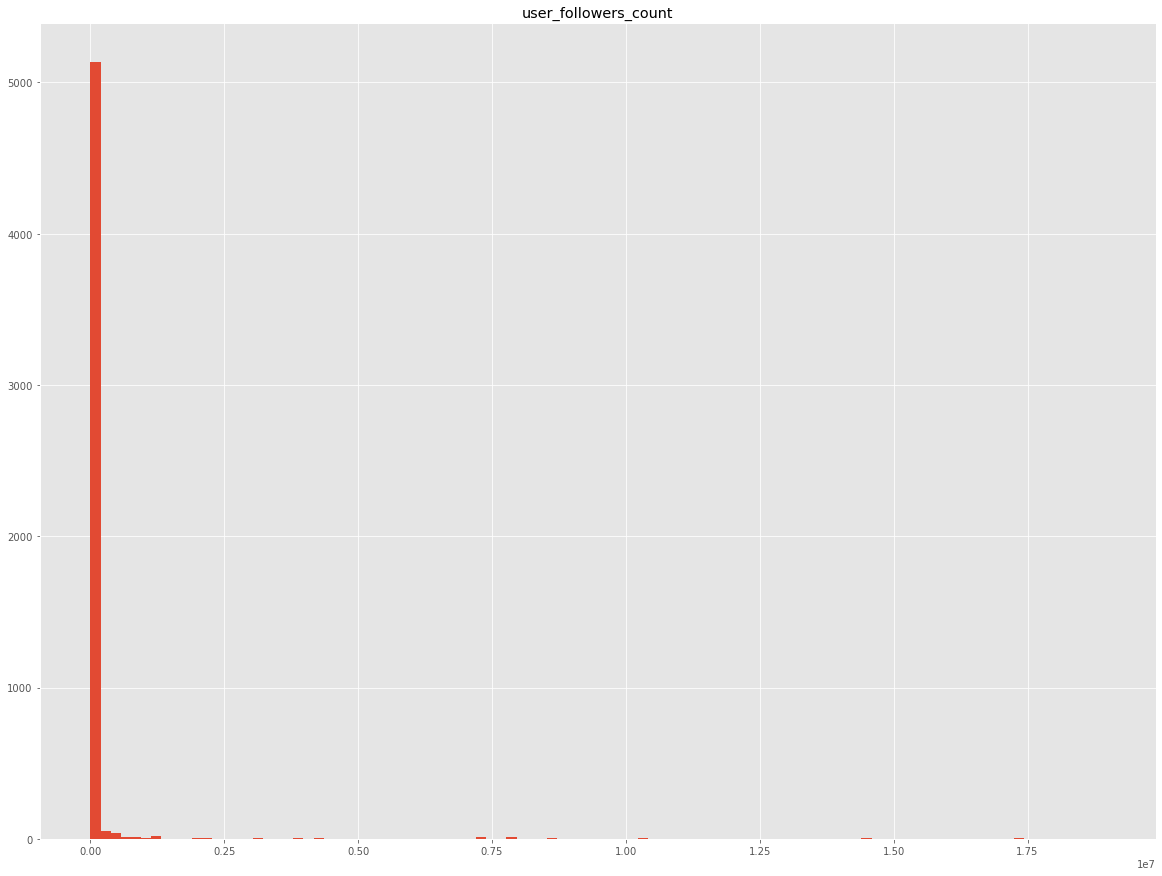

In [10]:
#visualising for better undertanding of the spread of the variables
df.hist(bins=100, figsize=(20,15))
plt.show()

In [10]:
# IMPORT modules for natural language processing

In [11]:
import re
import string
import nltk

In [12]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

In [13]:
#creating a stopwords set
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/noeljoseph/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
df.columns

Index(['Unnamed: 0', 'date', 'content', 'replyCount', 'retweetCount',
       'likeCount', 'lang', 'sourceLabel', 'hashtags', 'username',
       'user_dispaly_name', 'user_description', 'user_raw_description',
       'user_verified', 'user_created', 'user_followers_count',
       'user_friends_count', 'user_status_count', 'user_favourites_count',
       'user_listed_count', 'user_media_count', 'user_location'],
      dtype='object')

<AxesSubplot:>

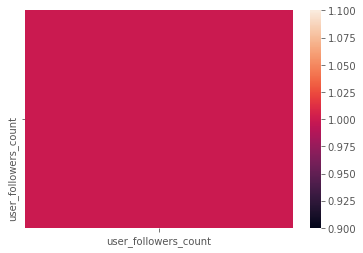

In [15]:
import seaborn as sns
sns.heatmap(df.corr())

Percentage False    0.674832
False    0.214099
True     0.091062
True     0.019820
24990    0.000187
Name: user_verified, dtype: float64


<AxesSubplot:ylabel='user_verified'>

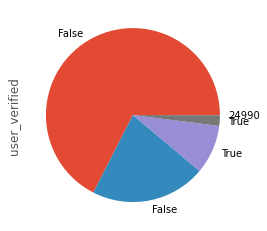

In [17]:
print('Percentage',df.user_verified.value_counts(normalize=True))
df.user_verified.value_counts(normalize=True).plot(kind='pie')

In [16]:
df.columns

Index(['Unnamed: 0', 'date', 'content', 'replyCount', 'retweetCount',
       'likeCount', 'lang', 'sourceLabel', 'hashtags', 'username',
       'user_dispaly_name', 'user_description', 'user_raw_description',
       'user_verified', 'user_created', 'user_followers_count',
       'user_friends_count', 'user_status_count', 'user_favourites_count',
       'user_listed_count', 'user_media_count', 'user_location'],
      dtype='object')

In [17]:
# make a new dataframe with only content
content_df = df.drop(['Unnamed: 0', 'date', 'replyCount', 'retweetCount',
                      'likeCount', 'lang', 'sourceLabel', 'hashtags', 'username',
                      'user_dispaly_name', 'user_description', 'user_raw_description',
                      'user_verified', 'user_created', 'user_followers_count',
                      'user_friends_count', 'user_status_count', 'user_favourites_count',
                      'user_listed_count', 'user_media_count', 'user_location'], axis=1)
content_df.head()

,content
0,@cretiredroy @ArvindKejriwal Basic health care...
1,Kerala likely to oppose draft Electricity (Ame...
2,Kerala likely to oppose draft Electricity (Ame...
3,@RajKSinghIndia Sir national rooftop registrat...
4,@KSEBLtd very poor management by the so called...


In [18]:
content_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5352 entries, 0 to 5351
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  5349 non-null   object
dtypes: object(1)
memory usage: 41.9+ KB


In [19]:
content_df = content_df.rename(columns={'content':'tokenized_content'})

In [20]:
content_df.head()

,tokenized_content
0,@cretiredroy @ArvindKejriwal Basic health care...
1,Kerala likely to oppose draft Electricity (Ame...
2,Kerala likely to oppose draft Electricity (Ame...
3,@RajKSinghIndia Sir national rooftop registrat...
4,@KSEBLtd very poor management by the so called...


In [21]:
def preprocess_content_text(content):
    
    #convert all text to lowercase
    content = content.lower()
    
    #remove any urls
    content = re.sub(r"http\S+|www\S+|https\s+", "", content, flags=re.MULTILINE)
    
    #remove punctuations
    content = content.translate(str.maketrans("", "", string.punctuation))
    
    #remove # from tweet
    content = re.sub(r'\#', "", content)
    
    #remove stopwords
    content_tokens = word_tokenize(content)
    filtered_words = [word for word in content_tokens if word not in stop_words]
    
    #stemming
    #ps = PorterStemmer()
    #stemmed_words = [ps.stem(w) for w in filtered_words]
    
    #lemmatizing
    #lemmatizer = WordNetLemmatizer()
    #lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]
    
    return " ".join(filtered_words)
    

In [24]:
content_df.tokenized_content = content_df['tokenized_content'].apply(preprocess_content_text)

AttributeError: 'float' object has no attribute 'lower'

In [23]:
content_df.tokenized_content.head()
                

0    @cretiredroy @ArvindKejriwal Basic health care...
1    Kerala likely to oppose draft Electricity (Ame...
2    Kerala likely to oppose draft Electricity (Ame...
3    @RajKSinghIndia Sir national rooftop registrat...
4    @KSEBLtd very poor management by the so called...
Name: tokenized_content, dtype: object

In [32]:
#content_df = content_df.drop_duplicates('content')

In [33]:
#stemming
stemmer = PorterStemmer()
def stemming(data):
    content = [stemmer.stem(word) for word in data]
    return data

In [34]:
content_df['tokenized_content'] = content_df['tokenized_content'].apply(lambda x: stemming(x))

In [35]:
# check the data after pre-processing
content_df['tokenized_content'][0]

'private education training firms subject gst rules kerala aar'

In [36]:
# import VADER for sentiment analysis
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/noeljoseph/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [37]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [38]:
def sentiment_vader(content):
    over_all_polarity = sia.polarity_scores(content)
    if over_all_polarity['compound'] >= 0.05:
        return "positive"
    elif over_all_polarity['compound'] <= -0.05:
        return "negative"
    else:
        return "neutral"

In [39]:
content_df['sentiment_vader'] = content_df['tokenized_content'].apply(lambda x: sentiment_vader(x))

In [40]:
#diplay the dataframe with the new column for sentiment
content_df

,tokenized_content,sentiment_vader
0,private education training firms subject gst r...,neutral
1,right appeal could deprived amount paid releas...,negative
2,paguthuaribavan still talk south right happene...,positive
3,india online education firms exempt gst clarif...,positive
4,gst caselaw right appeal could deprived amount...,negative
...,...,...
10452,gst kerala implement eway bill december,neutral
10453,gst kerala implement eway bill december cleart...,neutral
10454,gst kerala implement eway bill december read,neutral
10455,gst kerala implement eway bill december read,neutral


In [41]:
print('Percentage',content_df['sentiment_vader'].value_counts(normalize=True))
#content_df.sentiment_vader._counts(normalize=True).plot(kind='pie')

Percentage positive    0.409008
neutral     0.310414
negative    0.280578
Name: sentiment_vader, dtype: float64


In [42]:
#extracting the positive for state
def positive_mention_state(content):
    terms = re.findall("modi|NTPC|union|centre|sold", content)
    
    return terms

In [43]:
content_df['centre_terms_mentioned'] = content_df['tokenized_content'].apply(lambda x: positive_mention_state(x))

In [44]:
content_df

,tokenized_content,sentiment_vader,centre_terms_mentioned
0,private education training firms subject gst r...,neutral,[]
1,right appeal could deprived amount paid releas...,negative,[]
2,paguthuaribavan still talk south right happene...,positive,[]
3,india online education firms exempt gst clarif...,positive,[]
4,gst caselaw right appeal could deprived amount...,negative,[]
...,...,...,...
10452,gst kerala implement eway bill december,neutral,[]
10453,gst kerala implement eway bill december cleart...,neutral,[]
10454,gst kerala implement eway bill december read,neutral,[]
10455,gst kerala implement eway bill december read,neutral,[]


In [45]:
#extracting the positive for state
def positive_mention_state(content):
    terms = re.findall("cm|kseb|state|buy", content)
    
    return terms

In [46]:
content_df['state_terms_mentioned'] = content_df['tokenized_content'].apply(lambda x: positive_mention_state(x))

In [47]:
content_df

,tokenized_content,sentiment_vader,centre_terms_mentioned,state_terms_mentioned
0,private education training firms subject gst r...,neutral,[],[]
1,right appeal could deprived amount paid releas...,negative,[],[state]
2,paguthuaribavan still talk south right happene...,positive,[],[state]
3,india online education firms exempt gst clarif...,positive,[],[]
4,gst caselaw right appeal could deprived amount...,negative,[],[]
...,...,...,...,...
10452,gst kerala implement eway bill december,neutral,[],[implement]
10453,gst kerala implement eway bill december cleart...,neutral,[],[implement]
10454,gst kerala implement eway bill december read,neutral,[],[implement]
10455,gst kerala implement eway bill december read,neutral,[],[implement]


In [48]:
#extracting the correct and incorrect attribution for state

def perception(content):
    if(content['sentiment_vader'] == 'positive' and len(content['centre_terms_mentioned'])!=0):
        return 'correct'
    elif(content['sentiment_vader'] == 'negative' and len(content['centre_terms_mentioned'])!=0):
        return 'correct'
    elif(content['sentiment_vader'] == 'positive' and len(content['state_terms_mentioned'])!=0):
        return 'incorrect'
    elif(content['sentiment_vader'] == 'negative' and len(content['state_terms_mentioned'])!=0):
        return 'incorrect'
    
    return ''

In [49]:
content_df['perception'] = content_df.apply(perception, axis=1)

In [50]:
content_df

,tokenized_content,sentiment_vader,centre_terms_mentioned,state_terms_mentioned,perception
0,private education training firms subject gst r...,neutral,[],[],
1,right appeal could deprived amount paid releas...,negative,[],[state],incorrect
2,paguthuaribavan still talk south right happene...,positive,[],[state],incorrect
3,india online education firms exempt gst clarif...,positive,[],[],
4,gst caselaw right appeal could deprived amount...,negative,[],[],
...,...,...,...,...,...
10452,gst kerala implement eway bill december,neutral,[],[implement],
10453,gst kerala implement eway bill december cleart...,neutral,[],[implement],
10454,gst kerala implement eway bill december read,neutral,[],[implement],
10455,gst kerala implement eway bill december read,neutral,[],[implement],


In [51]:
df.head()

,Unnamed: 0,date,content,replyCount,retweetCount,likeCount,lang,sourceLabel,hashtags,username,...,user_raw_description,user_verified,user_created,user_followers_count,user_friends_count,user_status_count,user_favourites_count,user_listed_count,user_media_count,user_location
0,0,2022-08-23 05:49:44+00:00,Private education training firms subject to GS...,0,0,0,en,WordPress.com,NaN,24Aandd,...,Read Business related News Today & latest Cryp...,False,2022-08-02T01:29:36+00:00,0,0,597,0,0,0,india
1,1,2022-08-23 02:31:23+00:00,Right to appeal could not be deprived if amoun...,1,0,0,en,Twitter Web App,NaN,GoyalPradeepCA,...,CA | Certified Fraud Examiner with ACFE | Acti...,False,2018-07-16T12:19:43+00:00,1594,1653,68385,62100,10,8506,"New Delhi, India"
2,2,2022-08-22 22:56:05+00:00,@Paguthuaribavan still have to talk about Sout...,0,0,0,en,Twitter Web App,NaN,adhu_idu111,...,NaN,False,2014-01-21T12:53:19+00:00,48,93,17077,20328,5,675,NaN
3,3,2022-08-22 12:00:09+00:00,#India\nOnline education firms not exempt from...,0,0,0,en,AutopostVatupdate,"['India', 'Exemption', 'GST', 'VAT', 'SalesTax...",TupdateVa,...,https://t.co/65UMeDsIIN is the first website t...,False,2018-08-30T08:20:45+00:00,557,1036,32592,28,5,21493,The Netherlands
4,4,2022-08-22 11:55:18+00:00,#GST #CaseLaw\n\nRight to appeal could not be ...,0,1,1,en,Twitter Web App,"['GST', 'CaseLaw', 'TaxmannUpdates', 'HighCourt']",taxmannindia,...,India's #1 source for everything on Tax & Corp...,True,2009-11-30T10:43:39+00:00,83991,318,51603,8228,207,6354,India


In [52]:
content_perception_df = pd.concat([content_df, df], axis=1)

In [53]:
content_perception_df.head()

,tokenized_content,sentiment_vader,centre_terms_mentioned,state_terms_mentioned,perception,Unnamed: 0,date,content,replyCount,retweetCount,...,user_raw_description,user_verified,user_created,user_followers_count,user_friends_count,user_status_count,user_favourites_count,user_listed_count,user_media_count,user_location
0,private education training firms subject gst r...,neutral,[],[],,0,2022-08-23 05:49:44+00:00,Private education training firms subject to GS...,0,0,...,Read Business related News Today & latest Cryp...,False,2022-08-02T01:29:36+00:00,0,0,597,0,0,0,india
1,right appeal could deprived amount paid releas...,negative,[],[state],incorrect,1,2022-08-23 02:31:23+00:00,Right to appeal could not be deprived if amoun...,1,0,...,CA | Certified Fraud Examiner with ACFE | Acti...,False,2018-07-16T12:19:43+00:00,1594,1653,68385,62100,10,8506,"New Delhi, India"
2,paguthuaribavan still talk south right happene...,positive,[],[state],incorrect,2,2022-08-22 22:56:05+00:00,@Paguthuaribavan still have to talk about Sout...,0,0,...,NaN,False,2014-01-21T12:53:19+00:00,48,93,17077,20328,5,675,NaN
3,india online education firms exempt gst clarif...,positive,[],[],,3,2022-08-22 12:00:09+00:00,#India\nOnline education firms not exempt from...,0,0,...,https://t.co/65UMeDsIIN is the first website t...,False,2018-08-30T08:20:45+00:00,557,1036,32592,28,5,21493,The Netherlands
4,gst caselaw right appeal could deprived amount...,negative,[],[],,4,2022-08-22 11:55:18+00:00,#GST #CaseLaw\n\nRight to appeal could not be ...,0,1,...,India's #1 source for everything on Tax & Corp...,True,2009-11-30T10:43:39+00:00,83991,318,51603,8228,207,6354,India


Percentage              0.640241
correct      0.192694
incorrect    0.167065
Name: perception, dtype: float64


<AxesSubplot:ylabel='perception'>

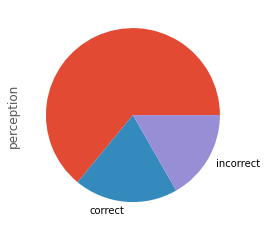

In [54]:
print('Percentage',content_perception_df.perception.value_counts(normalize=True))
content_perception_df.perception.value_counts(normalize=True).plot(kind='pie')

In [ ]:
#def perception(voter):
    #if voter == "1":
        #return "correct"
    #elif voter == "":
        #return "non-partisan"
    #elif voter == "0":
        #return "incorrect"

In [ ]:
#content_perception_df['voter'] = content_perception_df['voter_perception'].apply(perception)

In [ ]:
#content_perception_df

In [ ]:
#fig = plt.figure(figsize=(5,5))
#sns.countplot(x='voter', data = content_perception_df)

#### fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor': "black"}
tags = content_perception_df['voter'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors, startangle=90, wedgeprops = wp,
         explode = explode, label="")
plt.title("attribution of responsibility by voters")

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [56]:
vect = CountVectorizer(ngram_range=(1,2)).fit(content_perception_df['tokenized_content'])

In [57]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 132386

First 20 features:
 ['000', '000 crores', '000 yogbhavan', '002harryji', '002harryji thenewhound', '01', '01 2019', '01 cochin', '01 july', '01 read', '010', '010 paise', '0101a', '0101a scnorder', '01022020', '01022020 crucial', '010418', '010418 inter', '01042020', '01042020 pakistan']


In [58]:
x = content_perception_df['tokenized_content']
y = content_perception_df['perception']
x = vect.transform(x)

In [59]:
x.shape

(10457, 132386)

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [61]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (8365, 132386)
Size of y_train: (8365,)
Size of x_test: (2092, 132386)
Size of y_test: (2092,)


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [63]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test Accuracy: {:.2f}%".format(logreg_acc*100))

Test Accuracy: 87.57%


/Users/noeljoseph/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[1282   35   40]
 [  63  310    9]
 [ 112    1  240]]


              precision    recall  f1-score   support

                   0.88      0.94      0.91      1357
     correct       0.90      0.81      0.85       382
   incorrect       0.83      0.68      0.75       353

    accuracy                           0.88      2092
   macro avg       0.87      0.81      0.84      2092
weighted avg       0.87      0.88      0.87      2092



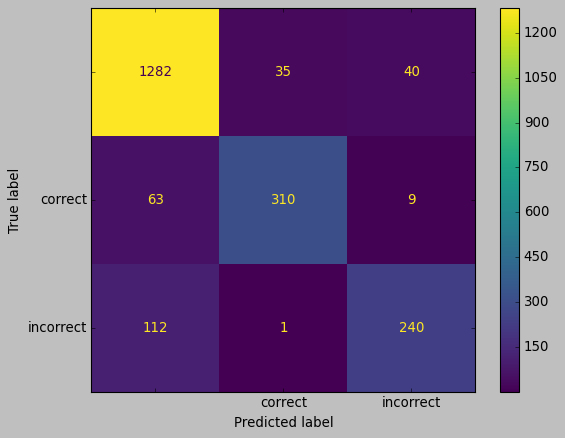

In [65]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
param_grid={'C':[0.001,0.01,0.1,1,10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

/Users/noeljoseph/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/noeljoseph/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [68]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [69]:
y_pred= grid.predict(x_test)

In [70]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 88.15%


In [71]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[1282   35   40]
 [  63  310    9]
 [ 112    1  240]]


              precision    recall  f1-score   support

                   0.88      0.94      0.91      1357
     correct       0.90      0.81      0.85       382
   incorrect       0.83      0.68      0.75       353

    accuracy                           0.88      2092
   macro avg       0.87      0.81      0.84      2092
weighted avg       0.87      0.88      0.87      2092



In [72]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [73]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:2f}%".format(svc_acc*100))

test accuracy: 88.240918%


In [74]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[1274   42   41]
 [  52  322    8]
 [ 101    2  250]]


              precision    recall  f1-score   support

                   0.89      0.94      0.92      1357
     correct       0.88      0.84      0.86       382
   incorrect       0.84      0.71      0.77       353

    accuracy                           0.88      2092
   macro avg       0.87      0.83      0.85      2092
weighted avg       0.88      0.88      0.88      2092



In [75]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel': ["linear", "poly", "rbf", "sigmoid"],
    'degree': [1,3,5,7],
    'gamma': [0.01, 1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

/Users/noeljoseph/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/noeljoseph/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/noeljoseph/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/noeljoseph/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/noeljoseph/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [76]:
print("Best parameter:", grid.best_params_)

Best parameter: {'C': 0.1}


In [77]:
y_pred = grid.predict(x_test)

In [78]:
logreg_acc= accuracy_score(y_pred, y_test)
print("Test Accuracy: {:.2f}%".format(logreg_acc*100))

Test Accuracy: 87.86%


In [79]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[1275   42   40]
 [  54  320    8]
 [ 108    2  243]]


              precision    recall  f1-score   support

                   0.89      0.94      0.91      1357
     correct       0.88      0.84      0.86       382
   incorrect       0.84      0.69      0.75       353

    accuracy                           0.88      2092
   macro avg       0.87      0.82      0.84      2092
weighted avg       0.88      0.88      0.88      2092



In [76]:
test_df = pd.read_csv('tweetfinalhealthkerala.csv')

/Users/noeljoseph/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (28,54,162,163,164,165,166,168,169,171,172,173,174,175,176,183,184,185,186,187,188,190,196,197,198,199,200,201,202,207,210,212,213,214,215) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
test_df.info()

In [ ]:
# drop the columns that are not required
test_df = test_df.drop(['_type', 'url', 'renderedContent', 'id', 'user',
                 'quoteCount', 'conversationId', 'source', 'sourceUrl',
                 'outlinks', 'tcooutlinks', 'media', 'retweetedTweet',
                 'quotedTweet', 'inReplyToTweetId','inReplyToUser',
                 'mentionedUsers', 'coordinates', 'place', 'cashtags',
                 'user_type', 'userID', 'user_description_urls',
                 'user_protected', 'user_link_url', 'user_linkTcourl',
                 'user_profile_imageUrl', 'user_profile_bannerUrl', 'user_label',
                 'user_url', 'label._type', 'label.description', 'label.url',
                 'label.badgeUrl', 'label.longDescription', '_type', 'id',
                 'quotedTweet.mentionedUsers', 'quotedTweet.coordinates',
                 'quotedTweet.place', 'quotedTweet.hashtags', 'quotedTweet.cashtags',
                 'user.label._type', 'user.label.description', 'user.label.url',
                 'user.label.badgeUrl','user.label.longDescription', 'quotedTweet.source',
                 'quotedTweet.sourceUrl', 'quotedTweet.sourceLabel', 'quotedTweet.outlinks',
                 'quotedTweet.tcooutlinks', 'quotedTweet.media', 'quotedTweet.retweetedTweet',
                 'quotedTweet.quotedTweet', 'quotedTweet.inReplyToTweetId', 'quotedTweet.inReplyToUser'], axis = 'columns')

In [ ]:
# drop additional columns that appear towards the right of the last relevant column
test_df.drop(test_df.columns[[22,23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
                    39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
                    57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,
                    76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
                    95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
                    111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
                    126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
                    141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
                    156, 157, 158, 159, 160, 161]], axis=1, inplace=True)

In [ ]:
test_df.info()

In [ ]:
# drop the rows
test_df.drop(test_df.index[:19800],0,inplace=True)

In [ ]:
test_df.info()

In [ ]:
#visualising for better undertanding of the spread of the variables
test_df.hist(bins=100, figsize=(20,15))
plt.show()

In [ ]:
test_df.columns

In [ ]:
content_test_df = test_df.drop(['Unnamed: 0', 'date', 'replyCount', 'retweetCount',
                      'likeCount', 'lang', 'sourceLabel', 'hashtags', 'username',
                      'user_dispaly_name', 'user_description', 'user_raw_description',
                      'user_verified', 'user_created', 'user_followers_count',
                      'user_friends_count', 'user_status_count', 'user_favourites_count',
                      'user_listed_count', 'user_media_count', 'user_location'], axis=1)
content_test_df.head()

In [ ]:
def preprocess_content_test_text(content):
    
    #convert all text to lowercase
    content = content.lower()
    
    #remove any urls
    content = re.sub(r"http\S+|www\S+|https\s+", "", content, flags=re.MULTILINE)
    
    #remove punctuations
    content = content.translate(str.maketrans("", "", string.punctuation))
    
    #remove # from tweet
    content = re.sub(r'\#', "", content)
    
    #remove stopwords
    content_tokens = word_tokenize(content)
    filtered_words = [word for word in content_tokens if word not in stop_words]
    
    #stemming
    #ps = PorterStemmer()
    #stemmed_words = [ps.stem(w) for w in filtered_words]
    
    #lemmatizing
    #lemmatizer = WordNetLemmatizer()
    #lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]
    
    return " ".join(filtered_words)
    

In [ ]:
content_test_df.content = content_test_df['content'].apply(preprocess_content_test_text)

In [ ]:
content_test_df.content.head()

In [ ]:
#stemming
stemmer = PorterStemmer()
def stemming(data):
    content = [stemmer.stem(word) for word in data]
    return data

In [ ]:
content_test_df['content'] = content_test_df['content'].apply(lambda x: stemming(x))

In [ ]:
content_test_df

In [ ]:
vect = CountVectorizer(ngram_range=(1,2)).fit(content_test_df['content'])

In [ ]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

In [ ]:
x = content_test_df['content']
x = vect.transform(x)

In [ ]:
x.shape

In [ ]:
content_test_df.shape

In [ ]:
prediction = SVCmodel.predict(x)